<a href="https://colab.research.google.com/github/venidaydream/Data-Science/blob/main/3_Taller_XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Gradient-Boosting-Machine" data-toc-modified-id="Gradient-Boosting-Machine-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Gradient Boosting Machine</a></span></li></ul></li><li><span><a href="#Los-datos" data-toc-modified-id="Los-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Los datos</a></span><ul class="toc-item"><li><span><a href="#Validamos-si-hay-missings" data-toc-modified-id="Validamos-si-hay-missings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Validamos si hay missings</a></span></li></ul></li><li><span><a href="#Descriptivo" data-toc-modified-id="Descriptivo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Descriptivo</a></span><ul class="toc-item"><li><span><a href="#Bivariante" data-toc-modified-id="Bivariante-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bivariante</a></span></li></ul></li><li><span><a href="#Train-y-Test" data-toc-modified-id="Train-y-Test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train y Test</a></span><ul class="toc-item"><li><span><a href="#3.-Modelando-(xgboost)" data-toc-modified-id="3.-Modelando-(xgboost)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>3. Modelando (xgboost)</a></span></li><li><span><a href="#Ejercicios" data-toc-modified-id="Ejercicios-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Ejercicios</a></span><ul class="toc-item"><li><span><a href="#Ajusta-los-hiperparametros-del-modelo-para-obtener-mejor-AUC" data-toc-modified-id="Ajusta-los-hiperparametros-del-modelo-para-obtener-mejor-AUC-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Ajusta los hiperparametros del modelo para obtener mejor AUC</a></span></li><li><span><a href="#Selecciona-las-5-variables-e-introduce-monotonias." data-toc-modified-id="Selecciona-las-5-variables-e-introduce-monotonias.-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Selecciona las 5 variables e introduce monotonias.</a></span></li><li><span><a href="#Calcula-el-AUC-de-ambos" data-toc-modified-id="Calcula-el-AUC-de-ambos-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Calcula el AUC de ambos</a></span></li></ul></li></ul></li></ul></div>

# Gradient Boosting Machine


El objetivo de este ejercicio es:
1. Identificar y visualizar los factores del customer churn:
1. Ajustar lo hiperparámetros de un modelo XGBOOST.
    * Clasificar si va a abandonar(churn) o no
    * Analizar las monotonias del modelo.


### Nombre y email de los integrantes del grupo

Venelina Peeva - venelinarumenova.peeva@alum.upf.edu

Se modelará un GBM de tipo XGBOOST para detectar transacciones fraudulentas.

In [168]:
# import packages
import warnings
warnings.filterwarnings('ignore')

import os
import math
import time
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import timeit

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from sklearn.inspection import partial_dependence


%matplotlib inline


In [169]:
import xgboost
xgboost.__version__

'2.0.2'

## Los datos

<img src="https://s16353.pcdn.co/wp-content/uploads/2018/06/Churn.png" style="float: left;" width="400" height="100" />
# PREVENTING BANK CUSTOMER CHURN!
# " Exploratory Data Analysis  & Prediction!"

# 2018

source: [** by_Keldine Malit** ]

In [170]:
pd.set_option('display.max_columns', None)
card = pd.read_csv('/content/Churn_Modelling.csv')


- CreditScore: Más alto mejor
- Geography: Pais
- Gender: Género
- Age: Edat
- Tenure: Fondos de inversión
- Balance: Ahorro Pasivo
- NumOfProducts: Numero de productos
- HasCrCard: Tiene tarjeta de credito
- IsActiveMember: Cliente activo
- EstimatedSalary: Salario estimado
- Exited: 1 es Churn


In [171]:
card.shape

(10000, 14)

In [172]:
card.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [173]:
card.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [174]:
card.columns[0:30]


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [175]:
card.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Validamos si hay missings

In [176]:
# percentage of missing values in each column
round(100 * (card.isnull().sum()/len(card)),2).sort_values(ascending=False)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

## Descriptivo

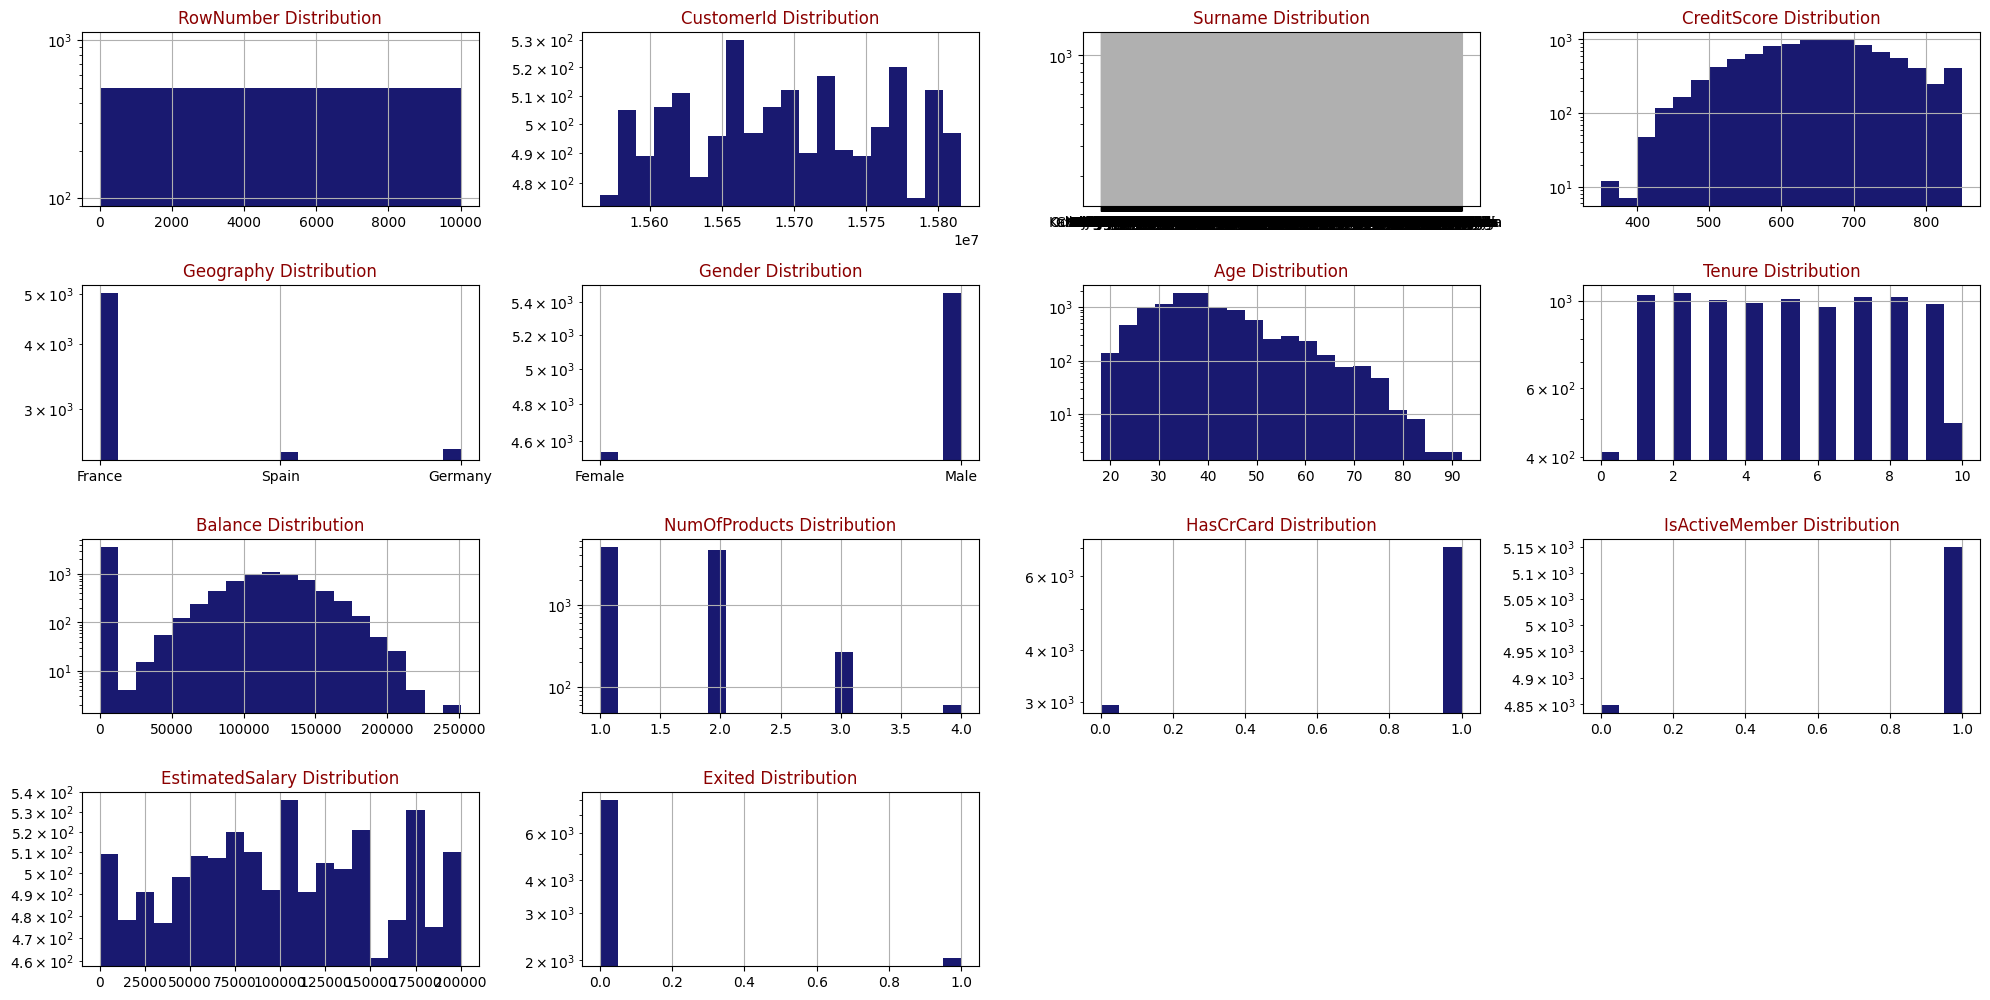

In [177]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()
draw_histograms(card,card.columns,8,4)

### Analizamos variable objetivo

In [178]:
card.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

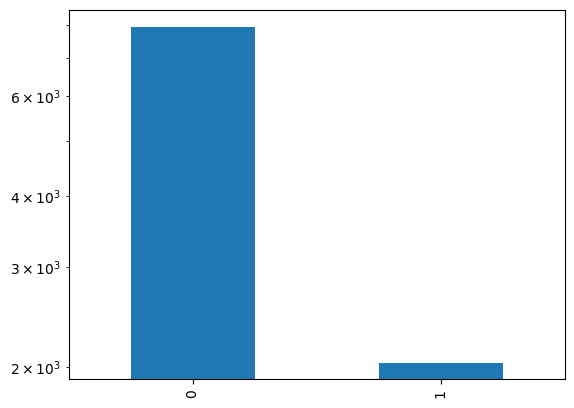

In [179]:
ax = card.Exited.value_counts().plot.bar();
ax.set_yscale('log')

### Preparamos datos


# Q1: Identifica qué mínimo 3 variables no tienen sentido y eliminalas de la muestra. ¿Hay alguna otra variable que puede considerarse problemática? Comentalo

# Respuesta Q1:

- hay que eliminar las columnas "RowNumber", "CustomerId", "Surname", porque sirven para identificar personas particulares y esto no sirve en el modelo.

- Es curioso que no todos los clientes que se han ido tienen el Balance a 0. Del dataset no se sabe 100% si se han ido del banco en general o solo de un producto particular.

- Yo quitaria la columna **EstimatedSalary**, por dos razones:

1. Es solo una estimacion

2. Es más importante el Balance, no el Salario, porque una persona podría tener más de una cuenta bancaria para diferentes objetivos - cuenta para recibir el salario, cuenta para gastos, cuenta para comprar online etc. Normalmente es facil abrir y cerrar cuentas sin relevancia del salario o como se distribuye.

In [180]:
# codigo Q1

In [181]:
card.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [182]:
card_original = card.copy()

In [183]:
card.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [184]:
#la nueva df con las columnas eliminadas
card.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Cambiamos tipos a category

# Q2: Cambia a tipo category las 4 variables y verifica que se ha hecho correctamente:
- Geography
- Gender
- HasCrCard
- IsActiveMember


In [185]:
card["Geography"] = card["Geography"].astype("category")
card["Gender"] = card["Gender"].astype("category")
card["HasCrCard"] = card["HasCrCard"].astype("category")
card["IsActiveMember"] = card["IsActiveMember"].astype("category")

In [186]:
card["Geography"].value_counts().sort_index()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [187]:
card["Gender"].value_counts().sort_index()

Female    4543
Male      5457
Name: Gender, dtype: int64

In [188]:
card["HasCrCard"].value_counts().sort_index()


0    2945
1    7055
Name: HasCrCard, dtype: int64

In [189]:
card["IsActiveMember"].value_counts().sort_index()

0    4849
1    5151
Name: IsActiveMember, dtype: int64

### Bivariante

In [190]:
def bivariante(df,nombreY,bins=7, rows=8, cols=4, size=(40,20)):
    fig=plt.figure(figsize=size)
    for i,varname in enumerate(df.columns):
        if varname!=nombreY:
            ax=fig.add_subplot(rows,cols,i+1)
            nombreX = varname
            df1 = df.copy()
            if df1[nombreX].dtype!='category':
                nombreX_plot = nombreX+'_c'
                df1[nombreX_plot] = pd.qcut(df1[nombreX],bins,duplicates="drop")
            else:
                nombreX_plot = nombreX

            ax = df1.groupby(nombreX_plot).size().plot(ax=ax,kind='bar');
            ax2 = ax.twinx()
            ax2.plot(ax.get_xticks(),
                     100*df1.groupby(nombreX_plot)[nombreY].mean(),
                     linestyle='-',
                     marker='o', linewidth=2.0,
                    c='red')
            plt.title("Bivariante de " + nombreX)
            ax2.set_ylabel('% '+nombreY, color='red')
            ax.set_ylabel('N')
            ax.set_xlabel(nombreX);
            fig.tight_layout()
    fig.tight_layout()
    plt.show()


Calculamos bivariante

In [191]:
card.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Q3 Identifica las monotonias de cada varible -1, 0 o 1 y interpreta de que forma impacta al Banco su realción con el abandono :

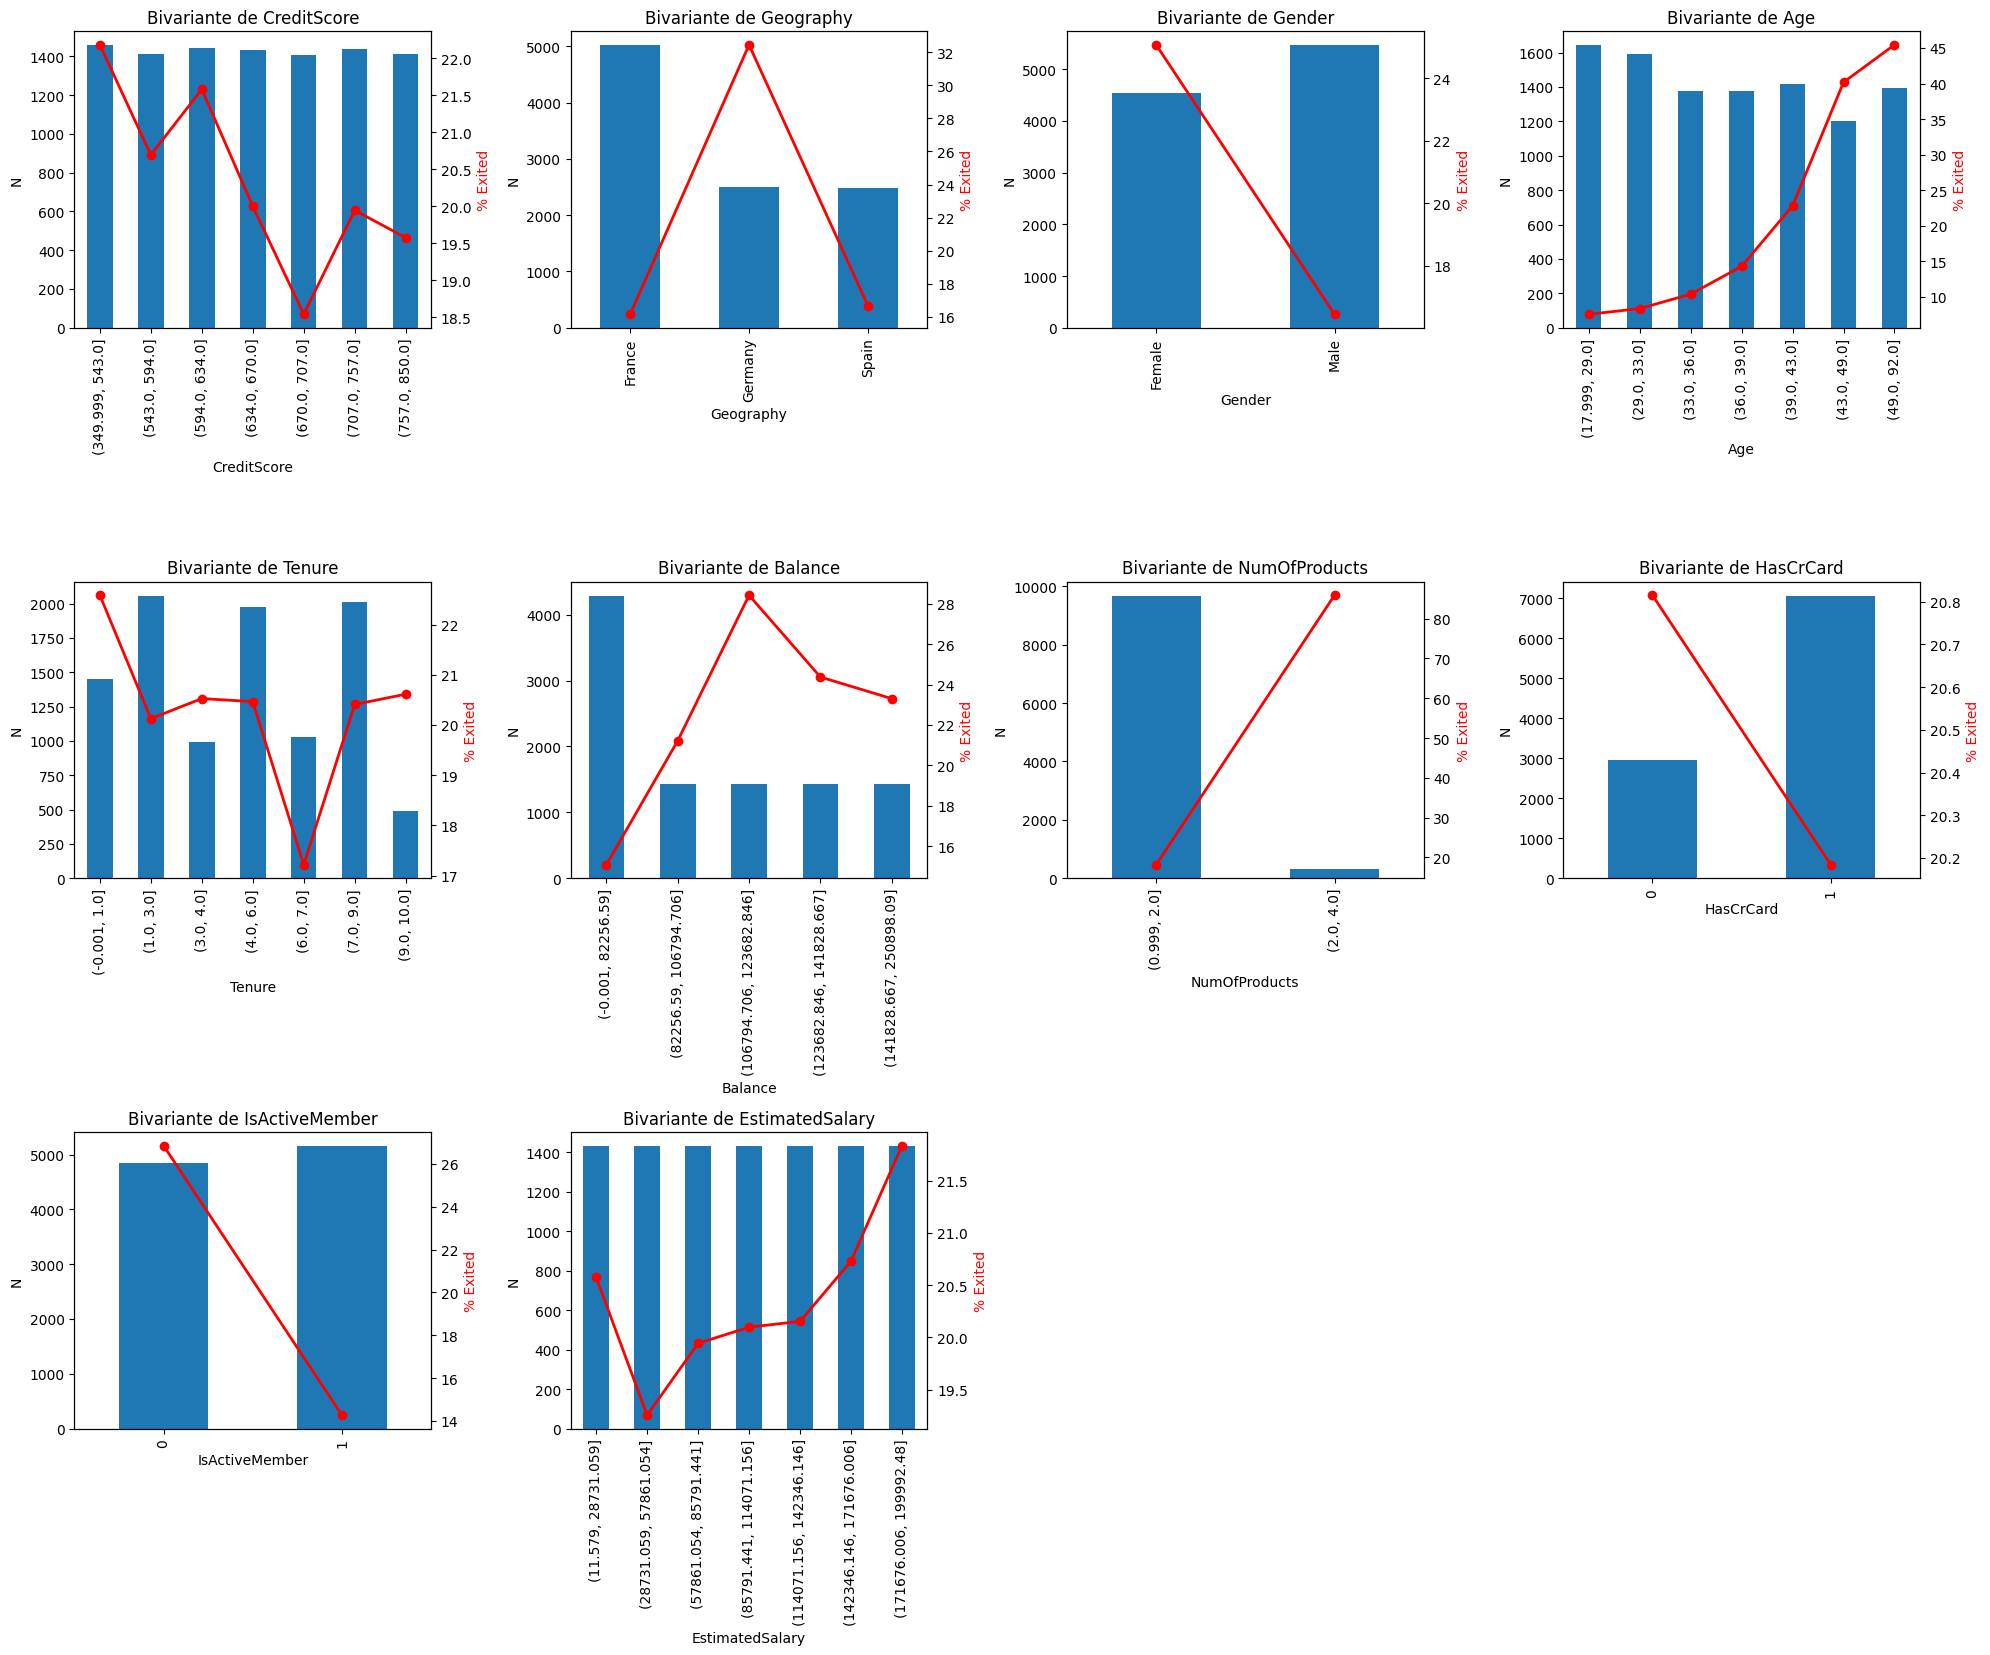

In [192]:
# codigo Q3
bivariante(df=card,nombreY= "Exited",bins=7, rows=4, cols=4, size=(20,20))

# Monotonias

Credit Score = -1, Geography = 0, Gender = 0, Age = 1, Tenure = 0, Balance = 1, NumProducts = 1, HasCrCard = -1, isActiveMember = -1, EstimatedSalary = 1



Credit Score = -1 - cuanto mayor el CreditScore, menos se van

Geography = 0 - es una categoria (discrete values) con valores fijados, ni crecientes, ni decrecientes

Gender = 0 - es una categoria (discrete values) con valores fijados, ni crecientes, ni decrecientes

Age = 1 - parece que cuanto mayor la persona, hay mas abandono

Tenure = 0 - es bastante distribuido entre los diferentes Tenures, con la unica exception de 6-7 años

Balance = 1 - parece que cuanto mayor el Balance, mas se van, y esto no esta bien para el banco

NumProducts = 1 - los clientes con mas de 2 productos suelen abandonar mas que los demas, que es algo sorprendente

HasCrCard = -1 - los que no tienen tarjeta de credito suelen abandonar mas que los que tienen

isActiveMember = -1 - logicamente los que no estan muy activos, se van mas a menudo que los demas

EstimatedSalary = 1 - cuanto mayor el salario, mas se va

## Train y Test

Separamos nuestro conjunto de datos en train y test y para ello usaremos:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [193]:
seed_val = 1234
test_size = 0.2
train, test= train_test_split(card,test_size= test_size, random_state=seed_val)

In [194]:
df_train = card.sample(frac=0.8,random_state=200)
df_test = card.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


In [195]:
# remove target column to create feature only dataset
X_train = train.drop(columns=['Exited'])
X_test = test.drop(columns=['Exited'])

In [196]:
# store target column as y-variables
y_train = train['Exited']
y_test = test['Exited']

In [197]:
#print first five instances for each data set

print(X_train.head())
print("--------------------------------")
print("--------------------------------")
print(X_test.head())

print(X_train.shape, y_train.shape,  X_test.shape, y_test.shape)
X_train.columns

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
5525          624    France    Male   51      10  123401.43              2   
5034          631   Germany  Female   29       2   96863.52              2   
4709          554    France    Male   31       1       0.00              2   
4218          589   Germany  Female   19       9   83495.11              1   
917           646    France  Female   45       3   47134.75              1   

     HasCrCard IsActiveMember  EstimatedSalary  
5525         1              1        127825.25  
5034         1              1         31613.35  
4709         0              1        192660.55  
4218         1              1        143022.31  
917          1              1         57236.44  
--------------------------------
--------------------------------
      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
2374          639     Spain    Male   29       4  133434.57              2   
1784          6

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [198]:
freq = y_train.value_counts()           # count frequency of different classes in training swet
freq/sum(freq)*100                     # get percentage of above

0    79.6875
1    20.3125
Name: Exited, dtype: float64

### 3. Modelando (xgboost)

Ajustemos el modelo con la muestra train

In [199]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5525,624,France,Male,51,10,123401.43,2,1,1,127825.25
5034,631,Germany,Female,29,2,96863.52,2,1,1,31613.35
4709,554,France,Male,31,1,0.00,2,0,1,192660.55
4218,589,Germany,Female,19,9,83495.11,1,1,1,143022.31
917,646,France,Female,45,3,47134.75,1,1,1,57236.44


In [200]:
monotone_vec = (0,0,0,0,0,0,0,0,0,0) # modificar segun numero de varibeles
print(len(monotone_vec))
print(X_train.shape[1])

10
10


In [201]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators=20
                       , objective = 'binary:logistic'
                       , eval_metric = "logloss"
                       , eta=0.9
                       , max_depth = 1
                       , min_child_weight = 5
                       , subsample = 0.5
                       , colsample_bytree=0.5
                       , monotone_constraints=monotone_vec
                       , enable_categorical = True
                       , seed=123)

In [202]:
xgboost.fit(X_train,y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-logloss:0.45490	validation_1-logloss:0.46186
[1]	validation_0-logloss:0.42448	validation_1-logloss:0.42807
[2]	validation_0-logloss:0.39920	validation_1-logloss:0.39784
[3]	validation_0-logloss:0.38391	validation_1-logloss:0.38795
[4]	validation_0-logloss:0.37363	validation_1-logloss:0.37644
[5]	validation_0-logloss:0.36756	validation_1-logloss:0.37211
[6]	validation_0-logloss:0.36398	validation_1-logloss:0.37003
[7]	validation_0-logloss:0.35977	validation_1-logloss:0.36854
[8]	validation_0-logloss:0.35850	validation_1-logloss:0.36857
[9]	validation_0-logloss:0.35749	validation_1-logloss:0.36564
[10]	validation_0-logloss:0.35536	validation_1-logloss:0.36419
[11]	validation_0-logloss:0.35406	validation_1-logloss:0.36410
[12]	validation_0-logloss:0.35363	validation_1-logloss:0.36592
[13]	validation_0-logloss:0.35359	validation_1-logloss:0.36668
[14]	validation_0-logloss:0.35346	validation_1-logloss:0.36721
[15]	validation_0-logloss:0.35286	validation_1-logloss:0.36708
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.9, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, ...)

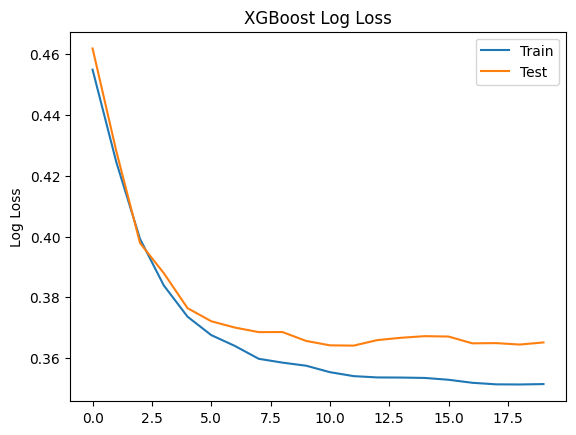

In [203]:
# plot log loss
results = xgboost.evals_result()
minLen = min([len(results['validation_0']['logloss']),len(results['validation_1']['logloss'])])
x_axis = range(0, minLen)


fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'][:minLen], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'][:minLen], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

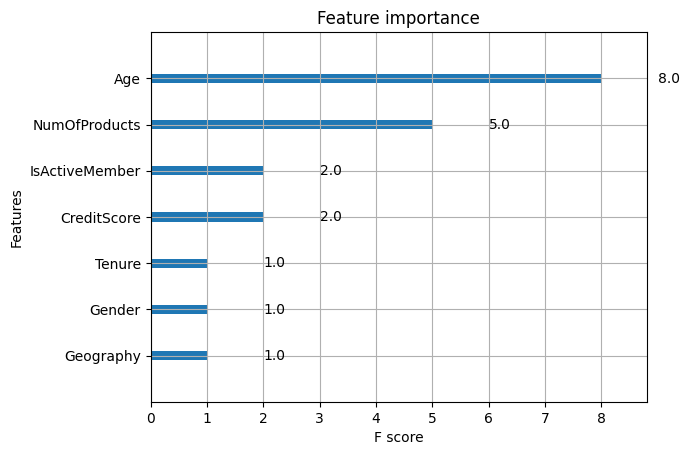

In [204]:
xgb.plot_importance(xgboost, max_num_features = 30)
plt.show()

AUC random predictions = 0.5
AUC predictions from xgboost model train set =  0.8507691825037708
AUC predictions from xgboost model test set =  0.8331020273409797


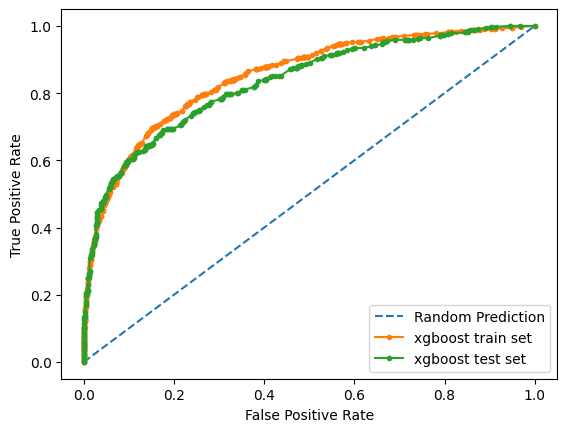

In [205]:
# Calculate the receiver operating curve and the AUC measure

xgb_prob_train = xgboost.predict_proba(X_train)[:, 1]
xgb_prob_test = xgboost.predict_proba(X_test)[:, 1]
ns_prob=[0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test, ns_prob)
xgb_auc_train = roc_auc_score(y_train, xgb_prob_train)
xgb_auc_test = roc_auc_score(y_test, xgb_prob_test)
print("AUC random predictions =", ns_auc)
print("AUC predictions from xgboost model train set = ", xgb_auc_train)
print("AUC predictions from xgboost model test set = ", xgb_auc_test)
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
xgb_fpr_train, xgb_tpr_train, _= roc_curve(y_train, xgb_prob_train)
xgb_fpr_test, xgb_tpr_test, _=roc_curve(y_test, xgb_prob_test)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Prediction')
plt.plot(xgb_fpr_train,xgb_tpr_train,marker='.',label='xgboost train set')
plt.plot(xgb_fpr_test,xgb_tpr_test,marker='.',label='xgboost test set')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


# Ejercicio Q4:

1. Ajusta 3 modelos con valor de hyperparametros distintos donde intoduzcas las monotonias
1. Decide el número de iteraciones óptimo para cada una de las propuestas.
1. Calcula el AUC de la muestra de train y test.
1. ¿Cuál de las 3 propuestas tiene mejor AUC de la muestra de test?
1. Interpreta las importancias de las variables del modelo seleccionado como el mejor (mayor AUC).



n_estimators: The number of boosting rounds.

objective: The objective function to optimize, which is set to 'binary:logistic' for binary classification.

eval_metric: The metric to evaluate the model's performance, which is set to 'logloss' for logarithmic loss.

eta: The learning rate, which controls the size of the step taken towards the optimal solution in each iteration.

max_depth: The maximum depth of the trees in the XGBoost model, which determines the complexity of the model.

min_child_weight: The minimum number of samples required in a child node for further splitting, which helps prevent overfitting by limiting the growth of the trees.

subsample: The fraction of samples used for training each tree, which controls the diversity of the trees and helps prevent overfitting.

colsample_bytree: The fraction of columns used for training each tree, which controls the variance of the trees and helps prevent overfitting.

monotone_constraints: A vector specifying the desired monotonic relationships between the features and the target variable.

enable_categorical: A flag indicating whether to treat categorical features as categorical or numerical.

seed: A random seed for reproducibility.

In [206]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100], 'enable_categorical': [True]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(xgb_grid)

0.8631249999999999
{'enable_categorical': True, 'gamma': 0.001, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.001, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


10
10
[0]	validation_0-logloss:0.45490	validation_1-logloss:0.46186
[1]	validation_0-logloss:0.42448	validation_1-logloss:0.42807
[2]	validation_0-logloss:0.39920	validation_1-logloss:0.39784
[3]	validation_0-logloss:0.38391	validation_1-logloss:0.38795
[4]	validation_0-logloss:0.37363	validation_1-logloss:0.37644
[5]	validation_0-logloss:0.36756	validation_1-logloss:0.37211
[6]	validation_0-logloss:0.36398	validation_1-logloss:0.37003
[7]	validation_0-logloss:0.35977	validation_1-logloss:0.36854
[8]	validation_0-logloss:0.35850	validation_1-logloss:0.36857
[9]	validation_0-logloss:0.35749	validation_1-logloss:0.36564
[10]	validation_0-logloss:0.35536	validation_1-logloss:0.36419
[11]	validation_0-logloss:0.35406	validation_1-logloss:0.36410
[12]	validation_0-logloss:0.35363	validation_1-logloss:0.36592
[13]	validation_0-logloss:0.35359	validation_1-logloss:0.36668
[14]	validation_0-logloss:0.35346	validation_1-logloss:0.36721
[15]	validation_0-logloss:0.35286	validation_1-logloss:0.36

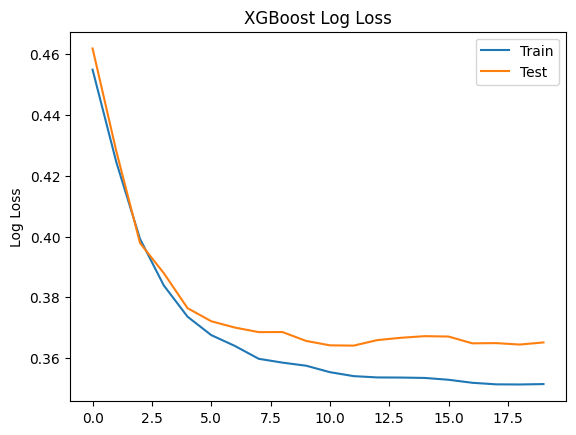

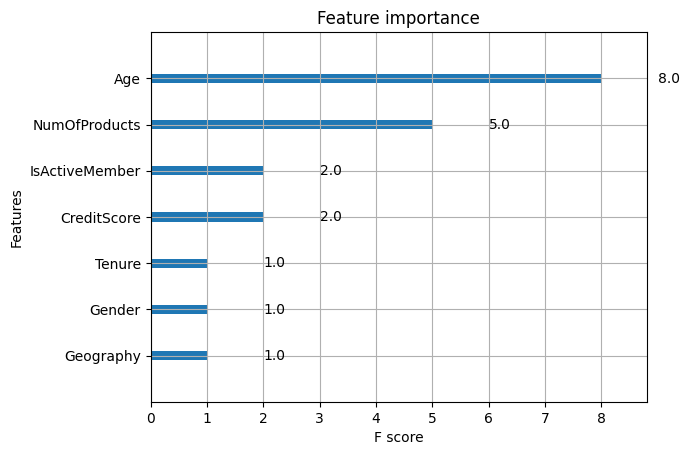

In [207]:
# Modelo 1
monotone_vec1 = (-1,0,0,1,0,1,1,-1,-1,1)
print(len(monotone_vec1))
print(X_train.shape[1])

from xgboost import XGBClassifier
xgboost1 = XGBClassifier(n_estimators=20
                       , objective = 'binary:logistic'
                       , eval_metric = "logloss"
                       , eta=0.9
                       , max_depth = 1
                       , min_child_weight = 5
                       , subsample = 0.5
                       , colsample_bytree=0.5
                       , monotone_constraints=monotone_vec
                       , enable_categorical = True
                       , seed=123)
xgboost1.fit(X_train,y_train, eval_set=[(X_train, y_train), (X_test, y_test)])
# plot log loss
results = xgboost1.evals_result()
minLen = min([len(results['validation_0']['logloss']),len(results['validation_1']['logloss'])])
x_axis = range(0, minLen)


fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'][:minLen], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'][:minLen], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

xgb.plot_importance(xgboost1, max_num_features = 30)
plt.show()


10
10
[0]	validation_0-logloss:0.45638	validation_1-logloss:0.46333
[1]	validation_0-logloss:0.42534	validation_1-logloss:0.42912
[2]	validation_0-logloss:0.41957	validation_1-logloss:0.41900
[3]	validation_0-logloss:0.40186	validation_1-logloss:0.40741
[4]	validation_0-logloss:0.39441	validation_1-logloss:0.40176
[5]	validation_0-logloss:0.38875	validation_1-logloss:0.39477
[6]	validation_0-logloss:0.38738	validation_1-logloss:0.39415
[7]	validation_0-logloss:0.38324	validation_1-logloss:0.39230
[8]	validation_0-logloss:0.38225	validation_1-logloss:0.39164
[9]	validation_0-logloss:0.38148	validation_1-logloss:0.39065
[10]	validation_0-logloss:0.38071	validation_1-logloss:0.39126
[11]	validation_0-logloss:0.38044	validation_1-logloss:0.39167
[12]	validation_0-logloss:0.37993	validation_1-logloss:0.39147
[13]	validation_0-logloss:0.37990	validation_1-logloss:0.39061
[14]	validation_0-logloss:0.37943	validation_1-logloss:0.39059
[15]	validation_0-logloss:0.37936	validation_1-logloss:0.38

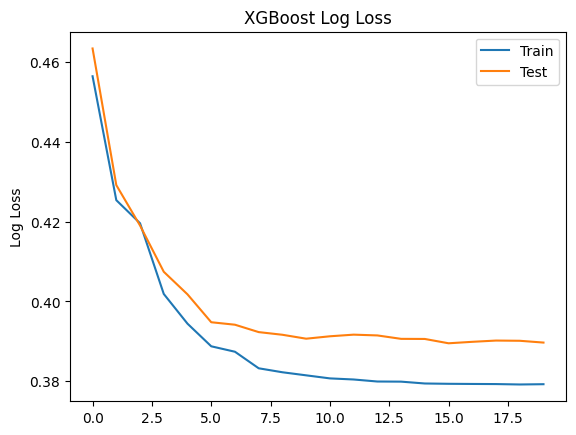

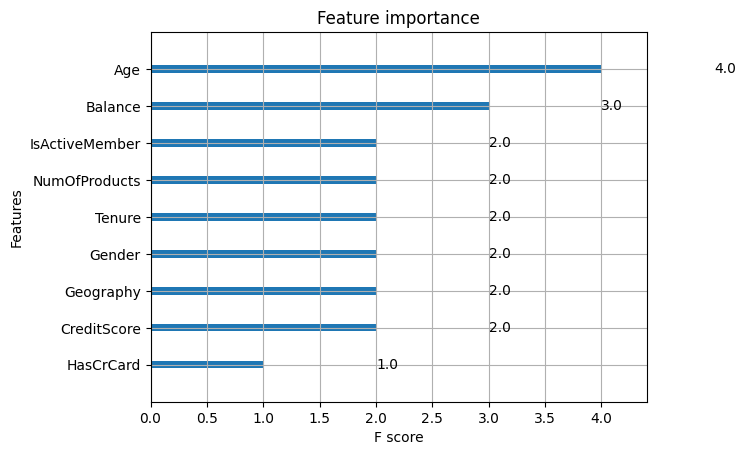

In [208]:
# Modelo 2
monotone_vec2 = (-1,0,0,1,0,1,1,-1,-1,0)
print(len(monotone_vec2))
print(X_train.shape[1])


from xgboost import XGBClassifier
xgboost2 = XGBClassifier(n_estimators=20
                       , objective = 'binary:logistic'
                       , eval_metric = "logloss"
                       , eta=0.9
                       , max_depth = 1
                       , min_child_weight = 5
                       , subsample = 0.8
                       , colsample_bytree=0.5
                       , monotone_constraints=monotone_vec2
                       , enable_categorical = True
                       , seed=123)
xgboost2.fit(X_train,y_train, eval_set=[(X_train, y_train), (X_test, y_test)])
# plot log loss
results = xgboost2.evals_result()
minLen = min([len(results['validation_0']['logloss']),len(results['validation_1']['logloss'])])
x_axis = range(0, minLen)


fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'][:minLen], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'][:minLen], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

xgb.plot_importance(xgboost2, max_num_features = 30)
plt.show()

[0]	validation_0-logloss:0.47890	validation_1-logloss:0.48251
[1]	validation_0-logloss:0.45725	validation_1-logloss:0.46078
[2]	validation_0-logloss:0.43955	validation_1-logloss:0.44341
[3]	validation_0-logloss:0.42482	validation_1-logloss:0.42880
[4]	validation_0-logloss:0.41278	validation_1-logloss:0.41743
[5]	validation_0-logloss:0.40235	validation_1-logloss:0.40727
[6]	validation_0-logloss:0.39337	validation_1-logloss:0.39840
[7]	validation_0-logloss:0.38537	validation_1-logloss:0.39109
[8]	validation_0-logloss:0.37841	validation_1-logloss:0.38474
[9]	validation_0-logloss:0.37219	validation_1-logloss:0.37914
[10]	validation_0-logloss:0.36707	validation_1-logloss:0.37514
[11]	validation_0-logloss:0.36193	validation_1-logloss:0.37066
[12]	validation_0-logloss:0.35765	validation_1-logloss:0.36711
[13]	validation_0-logloss:0.35370	validation_1-logloss:0.36361
[14]	validation_0-logloss:0.34973	validation_1-logloss:0.36100
[15]	validation_0-logloss:0.34647	validation_1-logloss:0.35888
[1

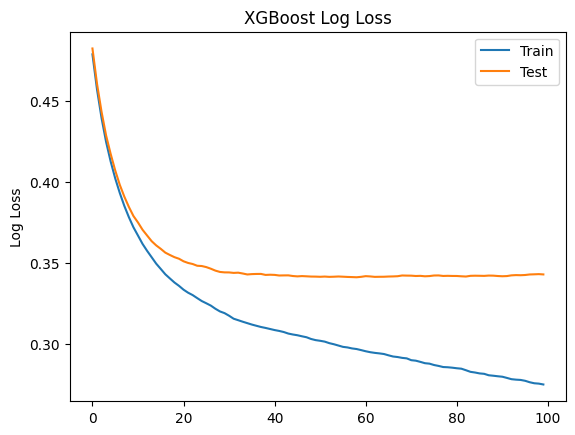

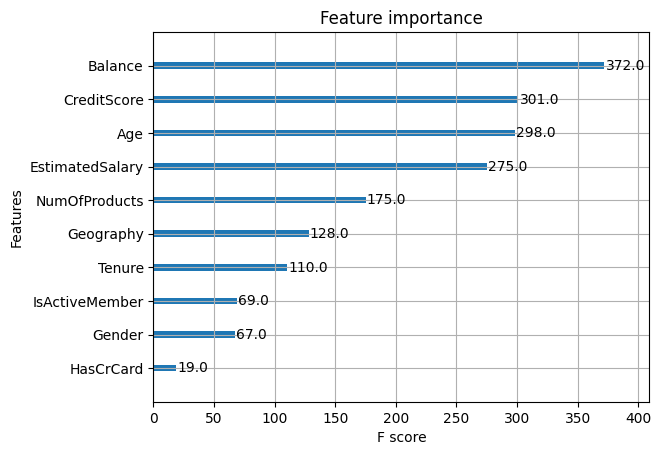

In [209]:
# Modelo 3
from xgboost import XGBClassifier
xgboost3 = XGBClassifier(enable_categorical=True,
                         gamma = 0.001,
                         eta= 0.1,
                         max_depth= 5,
                         min_child_weight= 5,
                         n_estimators= 100)
xgboost3.fit(X_train,y_train, eval_set=[(X_train, y_train), (X_test, y_test)])
# plot log loss
results = xgboost3.evals_result()
minLen = min([len(results['validation_0']['logloss']),len(results['validation_1']['logloss'])])
x_axis = range(0, minLen)


fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'][:minLen], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'][:minLen], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()


xgb.plot_importance(xgboost3, max_num_features = 30)
plt.show()

- Interpretacion de los importancias

AUC random predictions = 0.5
AUC predictions from xgboost model train set =  0.8507691825037708
AUC predictions from xgboost model test set =  0.8331020273409797


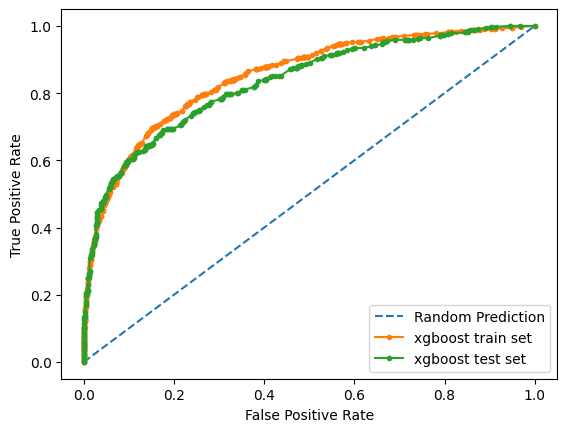

In [210]:
#AUC muestra train y test

# modelo 1

xgb_prob_train = xgboost1.predict_proba(X_train)[:, 1]
xgb_prob_test = xgboost1.predict_proba(X_test)[:, 1]
ns_prob=[0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test, ns_prob)
xgb_auc_train = roc_auc_score(y_train, xgb_prob_train)
xgb_auc_test = roc_auc_score(y_test, xgb_prob_test)
print("AUC random predictions =", ns_auc)
print("AUC predictions from xgboost model train set = ", xgb_auc_train)
print("AUC predictions from xgboost model test set = ", xgb_auc_test)
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
xgb_fpr_train, xgb_tpr_train, _= roc_curve(y_train, xgb_prob_train)
xgb_fpr_test, xgb_tpr_test, _=roc_curve(y_test, xgb_prob_test)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Prediction')
plt.plot(xgb_fpr_train,xgb_tpr_train,marker='.',label='xgboost train set')
plt.plot(xgb_fpr_test,xgb_tpr_test,marker='.',label='xgboost test set')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


AUC random predictions = 0.5
AUC predictions from xgboost model train set =  0.8171793182503772
AUC predictions from xgboost model test set =  0.8059360556112591


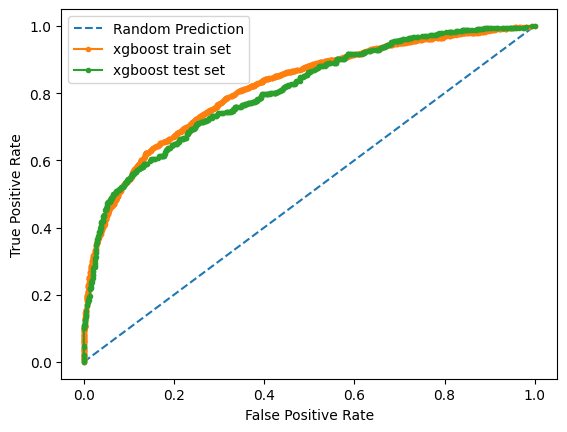

In [211]:
# modelo 2
xgb_prob_train = xgboost2.predict_proba(X_train)[:, 1]
xgb_prob_test = xgboost2.predict_proba(X_test)[:, 1]
ns_prob=[0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test, ns_prob)
xgb_auc_train = roc_auc_score(y_train, xgb_prob_train)
xgb_auc_test = roc_auc_score(y_test, xgb_prob_test)
print("AUC random predictions =", ns_auc)
print("AUC predictions from xgboost model train set = ", xgb_auc_train)
print("AUC predictions from xgboost model test set = ", xgb_auc_test)
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
xgb_fpr_train, xgb_tpr_train, _= roc_curve(y_train, xgb_prob_train)
xgb_fpr_test, xgb_tpr_test, _=roc_curve(y_test, xgb_prob_test)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Prediction')
plt.plot(xgb_fpr_train,xgb_tpr_train,marker='.',label='xgboost train set')
plt.plot(xgb_fpr_test,xgb_tpr_test,marker='.',label='xgboost test set')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC random predictions = 0.5
AUC predictions from xgboost model train set =  0.919162932126697
AUC predictions from xgboost model test set =  0.8562871414247635


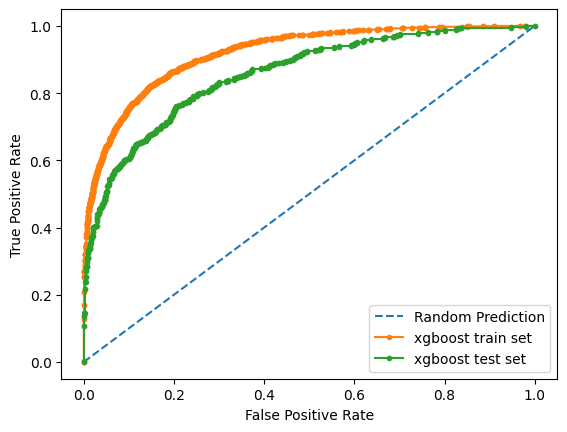

In [212]:
# modelo 3
xgb_prob_train = xgboost3.predict_proba(X_train)[:, 1]
xgb_prob_test = xgboost3.predict_proba(X_test)[:, 1]
ns_prob=[0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test, ns_prob)
xgb_auc_train = roc_auc_score(y_train, xgb_prob_train)
xgb_auc_test = roc_auc_score(y_test, xgb_prob_test)
print("AUC random predictions =", ns_auc)
print("AUC predictions from xgboost model train set = ", xgb_auc_train)
print("AUC predictions from xgboost model test set = ", xgb_auc_test)
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
xgb_fpr_train, xgb_tpr_train, _= roc_curve(y_train, xgb_prob_train)
xgb_fpr_test, xgb_tpr_test, _=roc_curve(y_test, xgb_prob_test)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Prediction')
plt.plot(xgb_fpr_train,xgb_tpr_train,marker='.',label='xgboost train set')
plt.plot(xgb_fpr_test,xgb_tpr_test,marker='.',label='xgboost test set')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

- Comentario AUC

Resumiendo los resultados del AOC:

Modelo 1:

AUC random predictions = 0.5

AUC predictions from xgboost model train set =  0.8507691825037708

AUC predictions from xgboost model test set =  0.8331020273409797

Modelo 2:

AUC random predictions = 0.5

AUC predictions from xgboost model train set =  0.8171793182503772

AUC predictions from xgboost model test set =  0.8059360556112591

Modelo 3:

AUC random predictions = 0.5

AUC predictions from xgboost model train set =  0.919162932126697

AUC predictions from xgboost model test set =  0.8562871414247635


Los AUC random predictions en todos los modelos son 0.5, indicando que los tres son balanced.

El mejor resultado de AUC predictions from xgboost model test set es en Modelo 3 de 0.8562, luego en Modelo 1 - 0.8331 y al final Modelo 2 - 0.8059. En todos los modelos, el modelo predice mejor con su train set de que su test set, indicando de posible overfitting. Pero resultados de 0.8562 es bastante bueno y acceptable.

Los parametros en el tercer Modelo vienen de buscar el mejor modelo con la libreria de GridSearchCV y por eso los parametros son un poco diferente de los demas y tiene las monotonias de por defecto. Modelo 1 es bastante similar al original, solo cambiando las monotonias de unas variables basandose al bivariante comentado antes. En el modelo 2 aparte de las monotias he cambiado tambien el parametro subsample, provando si ponemos mas datos para entrenar, no daria mejores resultados.

Segun Modelo 3 las variables que tienen la mayor influencia son - Balance, CreditScore y Age.